# Logistic Regression
<iframe src="https://giphy.com/embed/ekBEInfmgZ60Dn1X1r" width="480" height="250" style="" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/yes-or-no-ekBEInfmgZ60Dn1X1r">via GIPHY</a></p>


Logistic regression is an excellent example of how we can leverage mathematics to create new models that behave differently. 

The goal of logistical regression is to categorize a data set into categories.

Lets do an example - lets say we have a made up data set of mice being classified as not obese and obese. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split 

In [2]:
# Generate Random Weights between 20 grams and 60 grams
weight = np.random.uniform(20, 60, size=40) 

# Sort for better visualization
weight.sort(0)

# Convert to Dataframe
mice_dataset = pd.DataFrame(weight)
mice_dataset.columns = ["Weight"]
mice_dataset.index.name = "id"
print(mice_dataset[0::5])
print()
print(mice_dataset.describe())

       Weight
id           
0   22.297454
5   23.411039
10  26.957476
15  29.700431
20  33.498891
25  47.217837
30  49.607976
35  56.679916

          Weight
count  40.000000
mean   38.058676
std    13.214829
min    22.297454
25%    26.654321
50%    33.318954
75%    49.570945
max    59.303628


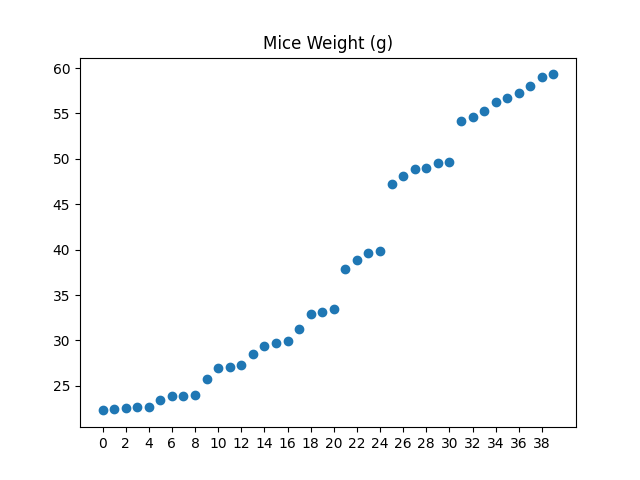

In [3]:
plt.figure()
plt.title("Mice Weight (g)")
plt.plot(mice_dataset, 'o')
plt.xticks(mice_dataset.index[::2])
plt.show()

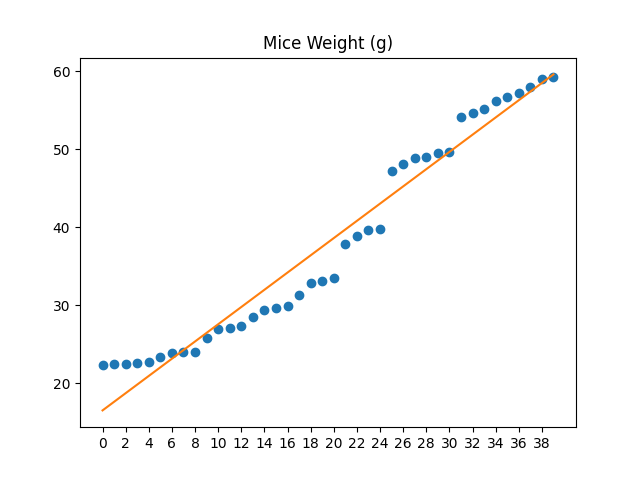

In [4]:
linear_regression_model = LinearRegression()
linear_regression_model.fit( np.array(mice_dataset.index).reshape(-1, 1), mice_dataset.values)

lin_y_hat = linear_regression_model.coef_[0] * np.arange(0, len(mice_dataset)) + linear_regression_model.intercept_
plt.figure()
plt.title("Mice Weight (g)")
plt.plot(mice_dataset, "o", mice_dataset.index, lin_y_hat)
plt.xticks(mice_dataset.index[::2])
plt.show()


Obese Weight [33.49889075]
    Weight
id        
0      0.0
5      0.0
10     0.0
15     0.0
20     1.0
25     1.0
30     1.0
35     1.0


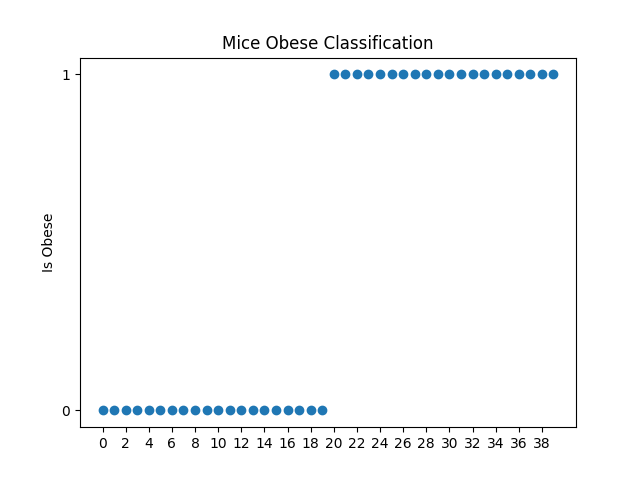

In [5]:
# Classify Mice Weight above the 75th percentile as "Obese"
seventy_fifth_percentile = int(len(mice_dataset)*2/4)
obese_weight = mice_dataset.values[seventy_fifth_percentile]
print("Obese Weight", obese_weight)

# Retain our original dataset
obese_mice_dataset = mice_dataset.__deepcopy__()

# Mask the values
obese_mice_dataset[obese_mice_dataset<obese_weight] = 0
obese_mice_dataset[obese_mice_dataset>=obese_weight] = 1
print(obese_mice_dataset[::5])

# Plot
plt.figure()
plt.plot(obese_mice_dataset, "o")
plt.title("Mice Obese Classification")
plt.ylabel("Is Obese")
plt.xticks(obese_mice_dataset.index[::2])
plt.yticks([0, 1])
plt.show()

Prediction Class [0. 0. 0. 0.]
Prediction Probably of that class [[9.99982112e-01 1.78879396e-05]
 [9.99979175e-01 2.08250176e-05]
 [9.99978232e-01 2.17677010e-05]
 [9.99975719e-01 2.42813180e-05]]

[[9.99982112e-01 1.78879396e-05]
 [9.99979175e-01 2.08250176e-05]
 [9.99978232e-01 2.17677010e-05]
 [9.99975719e-01 2.42813180e-05]
 [9.99974802e-01 2.51978654e-05]
 [9.99949666e-01 5.03343549e-05]
 [9.99921654e-01 7.83459010e-05]
 [9.99918274e-01 8.17255420e-05]
 [9.99914165e-01 8.58345235e-05]
 [9.99560091e-01 4.39908879e-04]]


c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\trent\Documents\DSC412\units\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


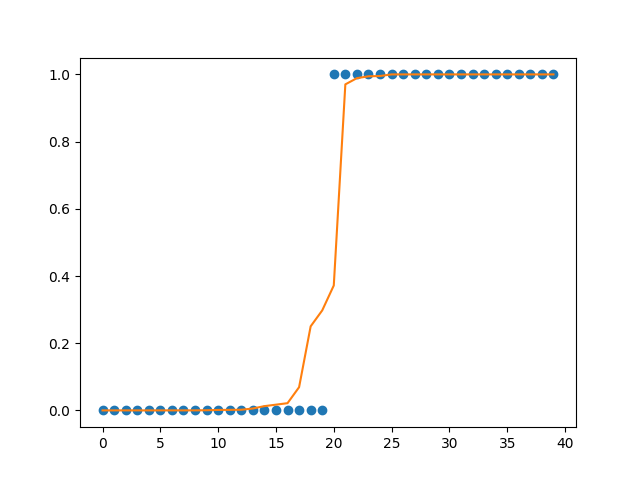

In [6]:
# Build our logistic regression model
logistic_model_mice = LogisticRegression()

logistic_model_mice.fit(mice_dataset, obese_mice_dataset)
result = logistic_model_mice.predict(mice_dataset[:4])
prob = logistic_model_mice.predict_proba(mice_dataset[:4])
print("Prediction Class", result)
print("Prediction Probably of that class", prob)
print()
all_mice_prob = logistic_model_mice.predict_proba(mice_dataset.values)
print(all_mice_prob[:10])
plt.figure()
plt.plot(obese_mice_dataset, 'o', all_mice_prob[:, 1])
plt.show()

# We are actually leveraging the sigmoid function here!

The Sigmoid function is a popular function to use since it attempts to bound the input of the function between two values on the y axis. In our case we use the sigmoid function without scaling, so it will bound our output between 0 and 1. 

The mathematical expression can be shown below:

![](./images/sigmoid_function.png)

Now lets turn that function into a program so we can use it!

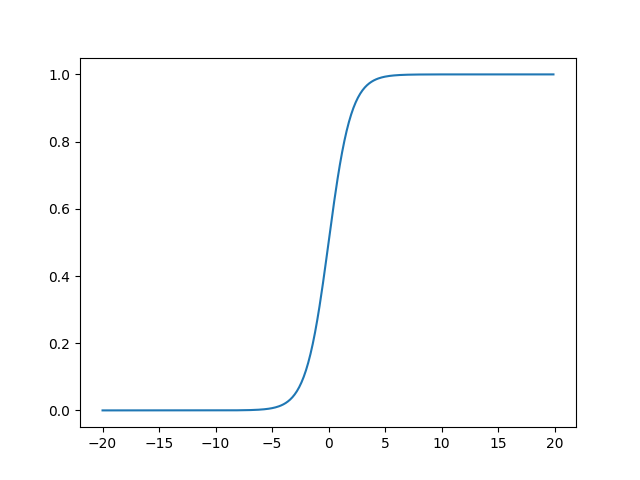

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

count = np.arange(-20, 20, 0.1)
out = sigmoid(count)
plt.figure()
plt.plot(count, out)
plt.show()


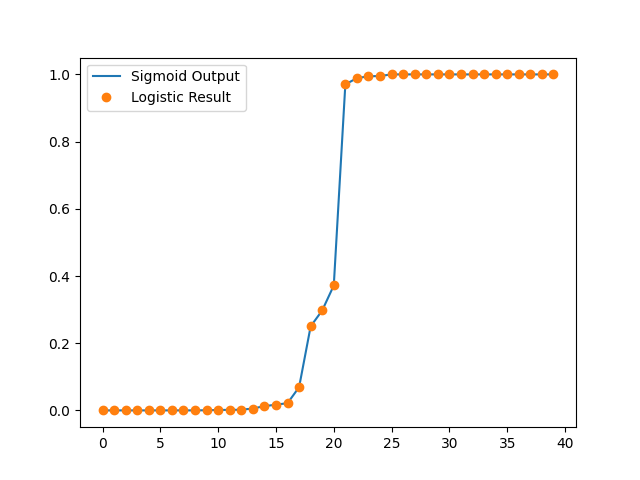

In [8]:
mice_hat = logistic_model_mice.coef_[0] * mice_dataset + logistic_model_mice.intercept_
log_reg_out_mice = sigmoid(mice_hat)
plt.figure()
plt.plot(mice_dataset.index, log_reg_out_mice,  all_mice_prob[:, 1], 'o')
plt.legend(["Sigmoid Output", "Logistic Result"])
plt.show()


## A more complex example

Here we have a popular data set that contains the following:
1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width
5. Class - Iris Setosa, Iris Versicolour, or Iris Virginica

X will contain the first 4 values, this will be our collected data
y is the output class

Lets try to use logistic regression to see if we can predict the class of a new iris given its data.


In [9]:
# Import the method to load the iris data
from sklearn.datasets import load_iris

# Load the Iris Data
X_iris, y_iris = load_iris(return_X_y=True)

# Split the data into training and test sets, shuffle the data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, random_state=12, test_size=.25, shuffle=True)
print("Model Classification:\n", y_train_iris)

Model Classification:
 [0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1 1 1 1 2 0 2 2 0
 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2 2 0 0 2 1 1 2 0
 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2 2 2 0 0 1 0 2 2
 1]


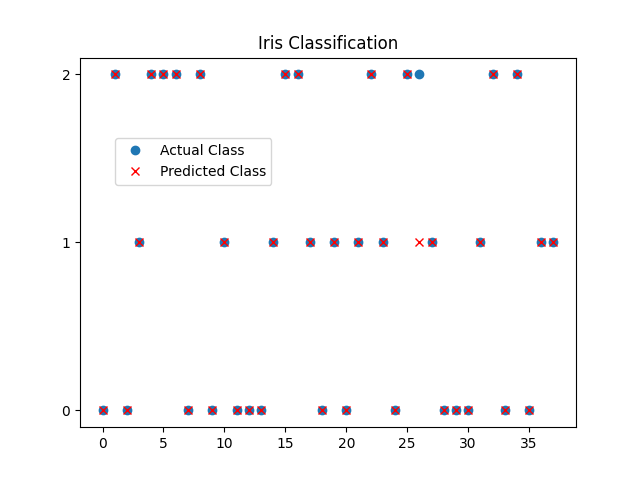

Mean Accuracy 0.9733333333333334
Classes [0 1 2]


In [10]:
# Fit the training data to train the model
iris_log_model = LogisticRegression(random_state=0).fit(X_train_iris, y_train_iris)
# Then use the data we did not use to train! 
y_out = iris_log_model.predict(X_test_iris)

# Plot the Data and Compare
plt.figure()
plt.title("Iris Classification")
plt.plot(pd.DataFrame(y_out), 'o', pd.DataFrame(y_test_iris), 'rx')
plt.legend(["Actual Class", "Predicted Class"], bbox_to_anchor=(0.4, 0.8))
plt.yticks(iris_log_model.classes_)
plt.show()

# Print out some cool stuff
print("Mean Accuracy", iris_log_model.score(X_iris, y_iris))
print("Classes", iris_log_model.classes_)


## Heat Maps - finding relationships

We can utilize a tool called a heatmap to graphically see the relationship between each variable in our dataset. In our example we will see the correlation between each variable. Variables that have a strong correlation share a lot of the same information, and inversely those that do not correlate have a higher difference in information between them.

When working with a lot of data it may be beneficial to a company or research group to slim the training data down to decrease training times. This can be especially helpful when looking at preliminary results fora model. This can also be helpful when running the models "on edge" if the device does not have access to the cloud or internet - however sometimes using less data means less accuracy. Depending on your requirements from the model you may be able to reduce your accuracy for the benefit of speed or size.  

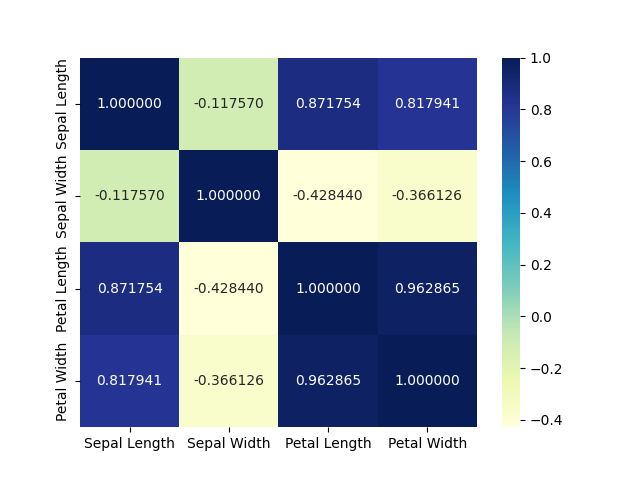

In [11]:
import seaborn as sns

iris_stats_df = pd.DataFrame(X_iris)
iris_stats_df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
plt.figure()
p1 = sns.heatmap(iris_stats_df.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()


In [12]:

# Separate the sepal data
sepal_data = iris_stats_df.loc[:, ["Sepal Length", "Sepal Width"]]
print(sepal_data.head())
# Split training and test set
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(sepal_data, y_iris, shuffle=True, test_size=.25, random_state=12)
# Create and Train Model
sepal_log_model = LogisticRegression()
sepal_log_model.fit(X_train_sepal, y_train_sepal)
# Determine score on data we did not train on
print("Mean Accuracy", sepal_log_model.score(X_test_sepal, y_test_sepal))


   Sepal Length  Sepal Width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6
Mean Accuracy 0.8421052631578947


## Citations
- https://www.kaggle.com/code/crbelhekar619/iris-dataset-eda-visualization

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

